In [14]:
import torch
import numpy as np
import sys
sys.path.append('../sunRay/')
sys.path.append('../')
import densityModel as dm
import matplotlib.pyplot as plt

In [2]:
dm.saito77

<function densityModel.saito77(r)>

In [3]:
x =  np.linspace(-1,1,300) 
y =  np.linspace(0,2,300) 
z =  np.linspace(-1,1,300) 

xx, yy, zz = torch.meshgrid(
    torch.tensor(x), torch.tensor(y), torch.tensor(z))

# turn on grad mode
xx = xx.clone().detach().requires_grad_(True)
yy = yy.clone().detach().requires_grad_(True)
zz = zz.clone().detach().requires_grad_(True)

In [4]:
# sunspot location
r_ss = torch.tensor([0,1,0])

rr = torch.sqrt(xx**2+yy**2+zz**2)
cos_theta_p = (xx*r_ss[0]+yy*r_ss[1]+zz*r_ss[2])/rr
sin_theta_p = torch.sqrt(1-cos_theta_p**2)
theta_hat_x = -r_ss[0] + cos_theta_p* xx/rr
theta_hat_y = -r_ss[1] + cos_theta_p* yy/rr
theta_hat_z = -r_ss[2] + cos_theta_p* zz/rr
theta_hat_r = torch.sqrt(theta_hat_x**2+theta_hat_y**2+theta_hat_z**2)

h = rr-1
b=0.0452

In [5]:
B_theta = 100* sin_theta_p*(
    (rr*(b**2))/2./(h**2.+b**2.)**(3./2.)-1+h/(h**2.+b**2.)**(1./2.))
B_r = 100* cos_theta_p*(1-(h/(h**2+b**2)**(1./2.)))

Bx = B_theta*theta_hat_x/theta_hat_r+B_r* xx/rr
By = B_theta*theta_hat_y/theta_hat_r+B_r* yy/rr
Bz = B_theta*theta_hat_z/theta_hat_r+B_r* zz/rr


# zero in sphere r=1
Bx[torch.where(rr<1)]=np.nan
By[torch.where(rr<1)]=np.nan
Bz[torch.where(rr<1)]=np.nan

#Bx[]

In [6]:
By.backward(torch.ones_like(By))

In [7]:
By_grad = xx.grad.data

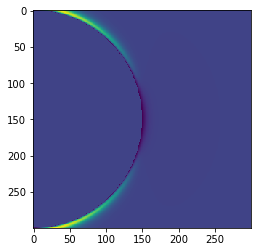

In [8]:
plt.imshow(By_grad[150,:,:].T)

In [9]:
# detach from diff graph
Bx=Bx.detach().numpy()
By=By.detach().numpy()
Bz=Bz.detach().numpy()
xx=xx.detach().numpy()
yy=yy.detach().numpy()
zz=zz.detach().numpy()

[Text(0.5, 0, 'y ($R_s$)'), Text(0.5, 1.0, '$B_y$')]

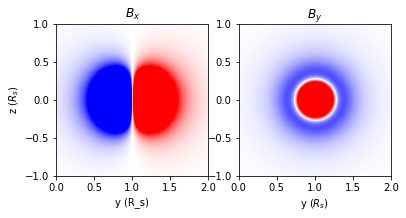

In [10]:
#slice [x=0,:,:]
idx_yslice = np.where(np.min(np.abs(y-1.001))==np.abs(y-1.001))

Bx_s = np.squeeze(Bx[:,idx_yslice,:])
By_s = np.squeeze(By[:,idx_yslice,:])
xx_s = np.array(xx[:,idx_yslice,:])
yy_s = np.array(yy[:,idx_yslice,:])

mask = np.zeros_like(By_s)
mask[np.isnan(By_s)]=True
By_s = np.ma.array(By_s, mask=mask)

figs,axs = plt.subplots(1,2)
axs[0].imshow(Bx_s.T,vmax=10,vmin=-10,cmap='bwr',
           extent=[np.min(y),np.max(y),np.min(z),np.max(z)])
axs[0].set(xlabel='y (R_s)',ylabel=r'z ($R_s$)',title='$B_x$')

axs[1].imshow(By_s.T,vmax=10,vmin=-10,cmap='bwr',
           extent=[np.min(y),np.max(y),np.min(z),np.max(z)])
axs[1].set(xlabel=r'y ($R_s$)',title='$B_y$')


[Text(0.5, 0, 'y ($R_s$)'), Text(0.5, 1.0, '$B_z$')]

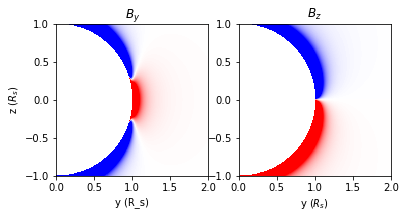

In [11]:
#slice [x=0,:,:]
By_s = np.array(By[150,:,:])
Bz_s = np.array(Bz[150,:,:])
yy_s = np.array(yy[150,:,:])
zz_s = np.array(zz[150,:,:])

mask = np.zeros_like(By_s)
mask[np.isnan(By_s)]=True
By_s = np.ma.array(By_s, mask=mask)

figs,axs = plt.subplots(1,2)
axs[0].imshow(By_s.T,vmax=10,vmin=-10,cmap='bwr',
           extent=[np.min(y),np.max(y),np.min(z),np.max(z)])
axs[0].set(xlabel='y (R_s)',ylabel=r'z ($R_s$)',title='$B_y$')

axs[1].imshow(Bz_s.T,vmax=10,vmin=-10,cmap='bwr',
           extent=[np.min(y),np.max(y),np.min(z),np.max(z)])
axs[1].set(xlabel=r'y ($R_s$)',title='$B_z$')

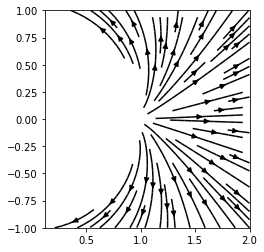

In [12]:
plt.streamplot(y,z,By_s.T,Bz_s.T,color='k')
plt.gca().set_aspect('equal')

In [15]:
import tool